# Pipeline - Titanic

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.neural_network import MLPClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic-clean.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


## Train/Test Split

In [3]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((704, 6), (177, 6))

## Pipeline

In [4]:
class Debug(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        print("**** DEBUG FITTING ****")
        print(X)
        return self

    def transform(self, X):
        print("**** DEBUG TRANSFORMING ****")
        print(X)
        return X
        

In [5]:
nn_params = {"hidden_layer_sizes": (10, 10, ),
             "max_iter": 1000,
             "verbose": True,
             "solver": "adam",
             "n_iter_no_change": 100,
             "early_stopping": True}

columns_to_scale = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
columns_to_encode = ["Embarked"]

transformer = ColumnTransformer(transformers=[("scaler",
                                               StandardScaler(),
                                               columns_to_scale),
                                              ("encoder",
                                               OneHotEncoder(),
                                               columns_to_encode)],
                               remainder="passthrough")


pipe = Pipeline(steps=[("transformer", transformer),
                       ("debug", Debug()),
                       ("model", MLPClassifier(**nn_params))])
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Embarked'])])),
                ('debug', Debug()),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

In [6]:
pipe.fit(X_train, y_train)

**** DEBUG FITTING ****
[[-0.40560607  0.71692293  0.24213445 ...  0.          0.
   1.        ]
 [ 0.80433745  0.71692293  0.38360721 ...  0.          0.
   1.        ]
 [ 0.80433745  0.71692293 -0.53596574 ...  1.          0.
   0.        ]
 ...
 [ 0.80433745  0.71692293 -0.25302022 ...  0.          0.
   1.        ]
 [-0.40560607  0.71692293  0.10066169 ...  0.          0.
   1.        ]
 [ 0.80433745  0.71692293 -0.11154745 ...  0.          0.
   1.        ]]
**** DEBUG TRANSFORMING ****
[[-0.40560607  0.71692293  0.24213445 ...  0.          0.
   1.        ]
 [ 0.80433745  0.71692293  0.38360721 ...  0.          0.
   1.        ]
 [ 0.80433745  0.71692293 -0.53596574 ...  1.          0.
   0.        ]
 ...
 [ 0.80433745  0.71692293 -0.25302022 ...  0.          0.
   1.        ]
 [-0.40560607  0.71692293  0.10066169 ...  0.          0.
   1.        ]
 [ 0.80433745  0.71692293 -0.11154745 ...  0.          0.
   1.        ]]
Iteration 1, loss = 0.67126000
Validation score: 0.577465
I

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Embarked'])])),
                ('debug', Debug()),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

In [7]:
pipe.score(X_test, y_test)

**** DEBUG TRANSFORMING ****
[[ 0.80433745  0.71692293 -0.3237566  ...  1.          0.
   0.        ]
 [-1.61554959 -1.39485006  0.38360721 ...  1.          0.
   0.        ]
 [ 0.80433745  0.71692293 -0.60670212 ...  1.          0.
   0.        ]
 ...
 [-1.61554959 -1.39485006  0.24213445 ...  0.          1.
   0.        ]
 [-1.61554959 -1.39485006 -0.53596574 ...  0.          0.
   1.        ]
 [-1.61554959  0.71692293 -0.11154745 ...  0.          0.
   1.        ]]


0.8192090395480226

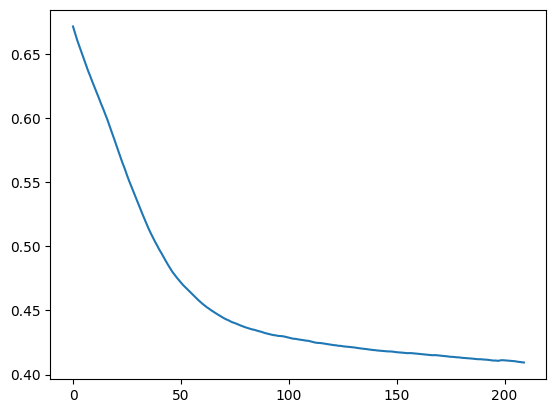

In [8]:
loss_curve = pipe["model"].loss_curve_
plt.plot(loss_curve)
plt.show()

In [9]:
pipe.predict(X_test)

**** DEBUG TRANSFORMING ****
[[ 0.80433745  0.71692293 -0.3237566  ...  1.          0.
   0.        ]
 [-1.61554959 -1.39485006  0.38360721 ...  1.          0.
   0.        ]
 [ 0.80433745  0.71692293 -0.60670212 ...  1.          0.
   0.        ]
 ...
 [-1.61554959 -1.39485006  0.24213445 ...  0.          1.
   0.        ]
 [-1.61554959 -1.39485006 -0.53596574 ...  0.          0.
   1.        ]
 [-1.61554959  0.71692293 -0.11154745 ...  0.          0.
   1.        ]]


array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0], dtype=int64)